In [ ]:
!pip install kaggle --upgrade
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kappa1312/risk-factor-prediction-of-chronic-kidney-disease

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/4.06k [00:00<?, ?B/s]
100% 4.06k/4.06k [00:00<00:00, 4.20MB/s]


**RISK FACTOR PREDICTION of Chronic Kidney Diseases**

In [ ]:
!unzip /content/risk-factor-prediction-of-chronic-kidney-disease.zip

Archive:  /content/risk-factor-prediction-of-chronic-kidney-disease.zip
  inflating: Risk Factor prediction of Chronic Kidney Disease.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/Risk Factor prediction of Chronic Kidney Disease.csv")

In [ ]:
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,...,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12


In [ ]:
df.drop([0,1],axis=0,inplace=True)

In [ ]:
df

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
5,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
6,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1,2,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,1,1,0,0,0,1,26.6175 - 51.7832,s3,1,≥ 74
198,0,0,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,0,1,0,0,0,1,< 26.6175,s4,1,≥ 74
199,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,51.7832 - 76.949,s2,0,≥ 74
200,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,102.115 - 127.281,s1,0,≥ 74


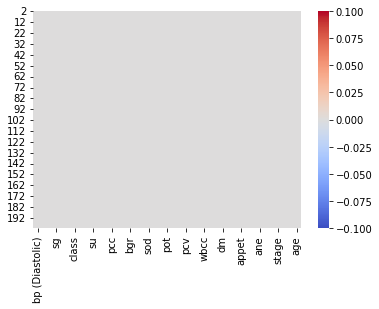

In [ ]:
sns.heatmap(df.isnull(),cmap='coolwarm')

In [ ]:
df['bp limit'].unique()

array(['0', '1', '2'], dtype=object)

In [ ]:
df['sg'].unique()

array(['1.019 - 1.021', '1.009 - 1.011', '1.015 - 1.017', '≥ 1.023',
       '< 1.007'], dtype=object)

In [ ]:
df = pd.get_dummies(df,columns=['sg'],drop_first=True)

In [ ]:
df = pd.get_dummies(df,columns=['al'],drop_first= True)

In [ ]:
df['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [ ]:
df = pd.get_dummies(df,columns=['class'],drop_first=True)

In [ ]:
df = pd.get_dummies(df,columns=['su'],drop_first=True)

In [ ]:
df.columns

Index(['bp (Diastolic)', 'bp limit', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'grf', 'stage', 'affected', 'age',
       'sg_1.015 - 1.017', 'sg_1.019 - 1.021', 'sg_< 1.007', 'sg_≥ 1.023',
       'al_2 - 2', 'al_3 - 3', 'al_< 0', 'al_≥ 4', 'class_notckd', 'su_2 - 2',
       'su_3 - 4', 'su_4 - 4', 'su_< 0', 'su_≥ 4'],
      dtype='object')

In [ ]:
cols = []

for i in df.columns:
  cols.append('{}'.format(i))

In [ ]:
cols

['bp (Diastolic)',
 'bp limit',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sod',
 'sc',
 'pot',
 'hemo',
 'pcv',
 'rbcc',
 'wbcc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'grf',
 'stage',
 'affected',
 'age',
 'sg_1.015 - 1.017',
 'sg_1.019 - 1.021',
 'sg_< 1.007',
 'sg_≥ 1.023',
 'al_2 - 2',
 'al_3 - 3',
 'al_< 0',
 'al_≥ 4',
 'class_notckd',
 'su_2 - 2',
 'su_3 - 4',
 'su_4 - 4',
 'su_< 0',
 'su_≥ 4']

In [ ]:
for i in cols:
  print(df[i].unique())

['0' '1']
['0' '1' '2']
['0' '1']
['0' '1']
['0' '1']
['0' '1']
['< 112' '112 - 154' '154 - 196' '406 - 448' '238 - 280' '196 - 238'
 '≥ 448' '280 - 322' '364 - 406' '322 - 364']
['< 48.1' '48.1 - 86.2' '200.5 - 238.6' '124.3 - 162.4' '86.2 - 124.3'
 '162.4 - 200.5' '≥ 352.9' '238.6 - 276.7']
['138 - 143' '133 - 138' '123 - 128' '143 - 148' '148 - 153' '< 118'
 '128 - 133' '118 - 123' '≥ 158']
['< 3.65' '3.65 - 6.8' '16.25 - 19.4' '6.8 - 9.95' '13.1 - 16.25'
 '9.95 - 13.1' '≥ 28.85']
['< 7.31' '≥ 42.59' '7.31 - 11.72' '38.18 - 42.59']
['11.3 - 12.6' '8.7 - 10' '13.9 - 15.2' '≥ 16.5' '10 - 11.3' '7.4 - 8.7'
 '12.6 - 13.9' '15.2 - 16.5' '< 6.1' '6.1 - 7.4']
['33.5 - 37.4' '29.6 - 33.5' '41.3 - 45.2' '37.4 - 41.3' '≥ 49.1'
 '21.8 - 25.7' '45.2 - 49.1' '< 17.9' '25.7 - 29.6' '17.9 - 21.8']
['4.46 - 5.05' '5.05 - 5.64' '3.28 - 3.87' '3.87 - 4.46' '6.23 - 6.82'
 '5.64 - 6.23' '2.69 - 3.28' '< 2.69' '≥ 7.41']
['7360 - 9740' '12120 - 14500' '14500 - 16880' '4980 - 7360' '< 4980'
 '9740 - 12120

In [ ]:
#6,7,8,9
cols[6:10]

['bgr', 'bu', 'sod', 'sc']

In [ ]:
df = pd.get_dummies(df,columns=['bgr', 'bu', 'sod', 'sc'],drop_first=True)

In [ ]:
df

,bp (Diastolic),bp limit,rbc,pc,pcc,ba,pot,hemo,pcv,rbcc,...,sod_143 - 148,sod_148 - 153,sod_< 118,sod_≥ 158,sc_16.25 - 19.4,sc_3.65 - 6.8,sc_6.8 - 9.95,sc_9.95 - 13.1,sc_< 3.65,sc_≥ 28.85
2,0,0,0,0,0,0,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,1,0,1,< 7.31,8.7 - 10,29.6 - 33.5,4.46 - 5.05,...,0,0,0,0,0,0,0,0,1,0
5,1,1,0,0,0,0,< 7.31,13.9 - 15.2,41.3 - 45.2,4.46 - 5.05,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,< 7.31,13.9 - 15.2,37.4 - 41.3,5.05 - 5.64,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1,2,0,0,0,0,< 7.31,8.7 - 10,29.6 - 33.5,4.46 - 5.05,...,0,0,0,0,0,0,0,0,1,0
198,0,0,0,0,0,0,< 7.31,7.4 - 8.7,21.8 - 25.7,4.46 - 5.05,...,0,0,0,0,0,0,0,0,1,0
199,1,1,0,0,0,0,< 7.31,15.2 - 16.5,37.4 - 41.3,6.23 - 6.82,...,1,0,0,0,0,0,0,0,1,0
200,1,1,0,0,0,0,< 7.31,13.9 - 15.2,45.2 - 49.1,4.46 - 5.05,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
cols[10:15]

['pot', 'hemo', 'pcv', 'rbcc', 'wbcc']

In [ ]:
df = pd.get_dummies(df,columns=['pot', 'hemo', 'pcv', 'rbcc', 'wbcc'],drop_first=True)

In [ ]:
df

,bp (Diastolic),bp limit,rbc,pc,pcc,ba,htn,dm,cad,appet,...,rbcc_< 2.69,rbcc_≥ 7.41,wbcc_14500 - 16880,wbcc_16880 - 19260,wbcc_19260 - 21640,wbcc_4980 - 7360,wbcc_7360 - 9740,wbcc_9740 - 12120,wbcc_< 4980,wbcc_≥ 24020
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1,2,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
198,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
199,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
200,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
cols[21:25]

['grf', 'stage', 'affected', 'age']

In [ ]:
df = pd.get_dummies(df,columns=['grf', 'stage', 'affected', 'age'],drop_first=True)

In [ ]:
cols = []

for i in df.columns:
  cols.append("{}".format(i))

In [ ]:
cols

['bp (Diastolic)',
 'bp limit',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'sg_1.015 - 1.017',
 'sg_1.019 - 1.021',
 'sg_< 1.007',
 'sg_≥ 1.023',
 'al_2 - 2',
 'al_3 - 3',
 'al_< 0',
 'al_≥ 4',
 'class_notckd',
 'su_2 - 2',
 'su_3 - 4',
 'su_4 - 4',
 'su_< 0',
 'su_≥ 4',
 'bgr_154 - 196',
 'bgr_196 - 238',
 'bgr_238 - 280',
 'bgr_280 - 322',
 'bgr_322 - 364',
 'bgr_364 - 406',
 'bgr_406 - 448',
 'bgr_< 112',
 'bgr_≥ 448',
 'bu_162.4 - 200.5',
 'bu_200.5 - 238.6',
 'bu_238.6 - 276.7',
 'bu_48.1 - 86.2',
 'bu_86.2 - 124.3',
 'bu_< 48.1',
 'bu_≥ 352.9',
 'sod_123 - 128',
 'sod_128 - 133',
 'sod_133 - 138',
 'sod_138 - 143',
 'sod_143 - 148',
 'sod_148 - 153',
 'sod_< 118',
 'sod_≥ 158',
 'sc_16.25 - 19.4',
 'sc_3.65 - 6.8',
 'sc_6.8 - 9.95',
 'sc_9.95 - 13.1',
 'sc_< 3.65',
 'sc_≥ 28.85',
 'pot_7.31 - 11.72',
 'pot_< 7.31',
 'pot_≥ 42.59',
 'hemo_11.3 - 12.6',
 'hemo_12.6 - 13.9',
 'hemo_13.9 - 15.2',
 'hemo_15.2 - 16.5',
 'hemo_6.1 - 7.4',
 'hemo_7.4 -

In [ ]:
df = df.drop(columns=['class_notckd'],axis=1)

In [ ]:
df.corr()['affected_1'].sort_values()[:-1]

al_< 0             -0.638222
sg_≥ 1.023         -0.522250
bu_< 48.1          -0.504116
hemo_15.2 - 16.5   -0.444444
pcv_≥ 49.1         -0.431993
                      ...   
stage_s3            0.321217
hemo_11.3 - 12.6    0.330359
stage_s5            0.345425
sg_1.015 - 1.017    0.351391
grf_< 26.6175       0.494326
Name: affected_1, Length: 103, dtype: float64

In [ ]:
df = df.sample(frac=1)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


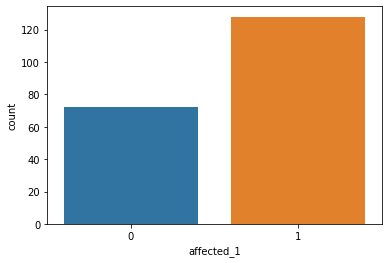

In [ ]:
sns.countplot(df['affected_1'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['affected_1'],axis=1)

y = df['affected_1']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=25,mode='min')

In [ ]:
validation_Data = (X_test,y_test)

In [ ]:
result = model.fit(X_train,y_train,validation_data=validation_Data,epochs=600,callbacks=[early_stop])

Epoch 1/600
5/5 [==============================] - 1s 61ms/step - loss: 0.7082 - accuracy: 0.5200 - val_loss: 0.6457 - val_accuracy: 0.8200
Epoch 2/600
5/5 [==============================] - 0s 10ms/step - loss: 0.6232 - accuracy: 0.7200 - val_loss: 0.6000 - val_accuracy: 0.6400
Epoch 3/600
5/5 [==============================] - 0s 10ms/step - loss: 0.5501 - accuracy: 0.7333 - val_loss: 0.5380 - val_accuracy: 0.6800
Epoch 4/600
5/5 [==============================] - 0s 9ms/step - loss: 0.4821 - accuracy: 0.7600 - val_loss: 0.4571 - val_accuracy: 0.8200
Epoch 5/600
5/5 [==============================] - 0s 10ms/step - loss: 0.3843 - accuracy: 0.8533 - val_loss: 0.3620 - val_accuracy: 0.9200
Epoch 6/600
5/5 [==============================] - 0s 8ms/step - loss: 0.2996 - accuracy: 0.9133 - val_loss: 0.2680 - val_accuracy: 0.9800
Epoch 7/600
5/5 [==============================] - 0s 9ms/step - loss: 0.2085 - accuracy: 0.9667 - val_loss: 0.1915 - val_accuracy: 0.9800
Epoch 8/600
5/5 [======

In [ ]:
loss = pd.DataFrame(model.history.history)

In [ ]:
loss

,loss,accuracy,val_loss,val_accuracy
0,0.708185,0.520000,0.645705,0.82
1,0.623184,0.720000,0.599972,0.64
2,0.550066,0.733333,0.538017,0.68
3,0.482057,0.760000,0.457099,0.82
4,0.384332,0.853333,0.361988,0.92
5,0.299608,0.913333,0.268016,0.98
6,0.208541,0.966667,0.191487,0.98
7,0.137908,0.980000,0.137454,0.98
8,0.096563,0.986667,0.107343,0.98
9,0.064590,0.993333,0.089681,0.98


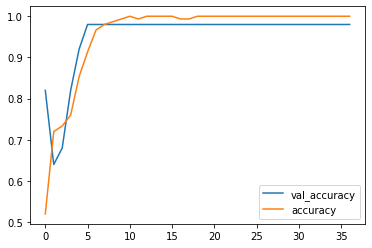

In [ ]:
loss[['val_accuracy','accuracy']].plot()

In [ ]:
preds = model.predict(X_test)

2/2 [==============================] - 0s 7ms/step


In [ ]:
preds = preds > 0.5

In [ ]:
preds

array([[False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [ ]:
model.save('risk_factor_detection_of_chronic_kidney_diseases.h5')

***Chronic Kidney Disease Clinical Records***

In [ ]:
!pip install kaggle --upgrade
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mansoordaku/ckdisease

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/9.51k [00:00<?, ?B/s]
100% 9.51k/9.51k [00:00<00:00, 34.8MB/s]


In [ ]:
!unzip /content/ckdisease.zip

Archive:  /content/ckdisease.zip
  inflating: kidney_disease.csv      


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/kidney_disease.csv")

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


<Axes: >

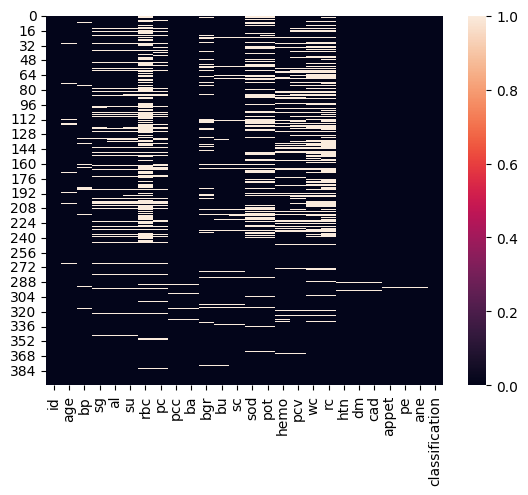

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df['age'].mean()

51.48337595907928

In [ ]:
df['age'] = df['age'].fillna(df['age'].mean())

In [ ]:
df.isnull().sum()

id                  0
age                 0
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df['age'].isnull().sum() > 0

False

In [ ]:
#rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
str_column = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','classification']

In [ ]:
columns = []

for i in df.columns:
  if (df['{}'.format(i)].isnull().sum() > 0):
    columns.append('{}'.format(i))
  else:
    print("0")

0
0
0


In [ ]:
str_column

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [ ]:
columns

['bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [ ]:
#rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification

In [ ]:
df['rbc'].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

In [ ]:
df.isnull().sum()

id                  0
age                 0
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df.drop(axis=1,inplace=True,columns=['pcv'])

In [ ]:
df.drop(columns=['wc','rc'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

id                  0
age                 0
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df['rbc'] = df['rbc'].fillna('normal')

In [ ]:
df['pc'] = df['pc'].fillna('normal')

In [ ]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,sod,pot,hemo,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,111.0,2.5,11.2,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,114.0,3.7,9.5,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,131.0,4.2,10.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,130.0,6.4,5.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,135.0,5.2,7.7,yes,yes,yes,poor,yes,yes,ckd


In [ ]:
for i in str_column:
  df = pd.get_dummies(df,columns=['{}'.format(i)],drop_first=True)

In [ ]:
df

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification_notckd
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,0,1,0,1,0,0,1,1,1,0
9,9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,...,0,1,0,1,1,0,1,0,1,0
11,11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,...,0,1,0,1,1,0,1,1,0,0
14,14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,...,0,1,1,1,1,1,1,1,0,0
20,20,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,...,0,0,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,...,1,0,0,0,0,0,0,0,0,1
396,396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,...,1,0,0,0,0,0,0,0,0,1
397,397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,...,1,0,0,0,0,0,0,0,0,1
398,398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
df = df.drop(columns=['id'],axis=1)

In [ ]:
df

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification_notckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,0,1,0,1,0,0,1,1,1,0
9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,...,0,1,0,1,1,0,1,0,1,0
11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,...,0,1,0,1,1,0,1,1,0,0
14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,...,0,1,1,1,1,1,1,1,0,0
20,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,...,0,0,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,1,0,0,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,1,0,0,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,1,0,0,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'rbc_normal', 'pc_normal', 'pcc_present', 'ba_present', 'htn_yes',
       'dm_yes', 'cad_yes', 'appet_poor', 'pe_yes', 'ane_yes',
       'classification_notckd'],
      dtype='object')

In [ ]:
df['hemo']

3      11.2
9       9.5
11     10.8
14      5.6
20      7.7
       ... 
395    15.7
396    16.5
397    15.8
398    14.2
399    15.8
Name: hemo, Length: 174, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df['classification_notckd'].unique()

array([0, 1], dtype=uint8)

In [ ]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'rbc_normal', 'pc_normal', 'pcc_present', 'ba_present', 'htn_yes',
       'dm_yes', 'cad_yes', 'appet_poor', 'pe_yes', 'ane_yes',
       'classification_notckd'],
      dtype='object')

In [ ]:
df['classification_notckd'].value_counts()

1    118
0     56
Name: classification_notckd, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['classification_notckd'],axis=1)

y = df['classification_notckd']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='rmsprop')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(patience=25,monitor='val_loss',mode='min')

In [ ]:
results = model.fit(X_train,y_train,validation_data=[X_test,y_test],epochs=600,callbacks=[early_stop])

Epoch 1/600
4/4 [==============================] - 6s 69ms/step - loss: 0.6543 - accuracy: 0.6810 - val_loss: 0.5542 - val_accuracy: 0.8966
Epoch 2/600
4/4 [==============================] - 0s 13ms/step - loss: 0.5385 - accuracy: 0.8793 - val_loss: 0.4379 - val_accuracy: 0.9310
Epoch 3/600
4/4 [==============================] - 0s 12ms/step - loss: 0.4135 - accuracy: 0.9569 - val_loss: 0.3363 - val_accuracy: 0.9310
Epoch 4/600
4/4 [==============================] - 0s 18ms/step - loss: 0.2981 - accuracy: 0.9741 - val_loss: 0.2445 - val_accuracy: 0.9483
Epoch 5/600
4/4 [==============================] - 0s 13ms/step - loss: 0.2131 - accuracy: 0.9655 - val_loss: 0.1972 - val_accuracy: 0.9310
Epoch 6/600
4/4 [==============================] - 0s 13ms/step - loss: 0.1610 - accuracy: 0.9741 - val_loss: 0.1576 - val_accuracy: 0.9483
Epoch 7/600
4/4 [==============================] - 0s 12ms/step - loss: 0.1325 - accuracy: 0.9655 - val_loss: 0.1183 - val_accuracy: 0.9483
Epoch 8/600
4/4 [===

In [ ]:
loss = pd.DataFrame(model.history.history)

In [ ]:
loss

,loss,accuracy,val_loss,val_accuracy
0,0.654348,0.681035,0.554161,0.896552
1,0.538516,0.879310,0.437920,0.931035
2,0.413482,0.956897,0.336267,0.931035
3,0.298055,0.974138,0.244491,0.948276
4,0.213091,0.965517,0.197174,0.931035
...,...,...,...,...
59,0.000136,1.000000,0.031168,0.982759
60,0.000163,1.000000,0.027140,0.982759
61,0.000105,1.000000,0.029493,0.982759
62,0.000096,1.000000,0.027418,0.982759


<Axes: >

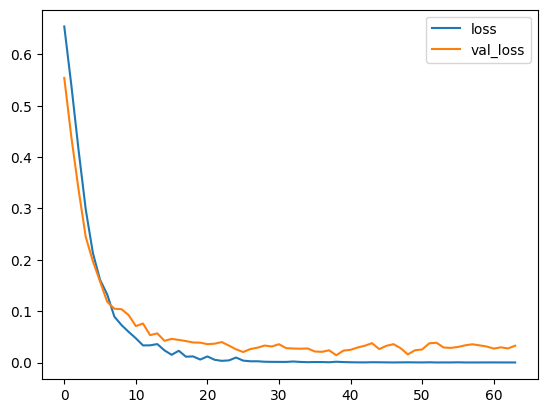

In [ ]:
loss[['loss','val_loss']].plot()

<Axes: >

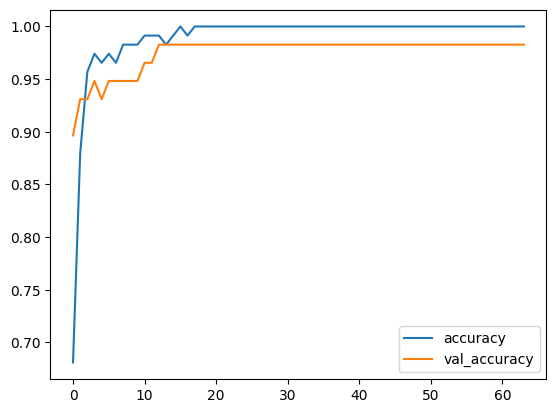

In [ ]:
loss[['accuracy','val_accuracy']].plot()

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification_notckd, Length: 391, dtype: uint8

In [ ]:
preds = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [ ]:
preds = preds > 0.5

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.97      1.00      0.99        38

    accuracy                           0.98        58
   macro avg       0.99      0.97      0.98        58
weighted avg       0.98      0.98      0.98        58



In [ ]:
model.save("Clinical_Records_For_CKD_rmsprop.h5")

In [ ]:
confusion_matrix(y_test,preds)

array([[19,  1],
       [ 0, 38]])

Unseen Data

In [ ]:
columns = df.columns

In [ ]:
columns[:-1]

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'rbc_normal', 'pc_normal', 'pcc_present', 'ba_present', 'htn_yes',
       'dm_yes', 'cad_yes', 'appet_poor', 'pe_yes', 'ane_yes'],
      dtype='object')

In [ ]:
print('Enter 1 for Yes & 0 for No')
print("Enter the values as they are if required")

features = []

list_ = []

columns = df.columns

for i in columns[:-1]:
    d = float(input('{} :'.format(i)))
    list_.append(d)

features = [list_]

features = pd.DataFrame(features)

predictions = model.predict(features)

predictions = predictions > 0.5

if predictions > 0.5:
  print("Probable High Risk")

else:
  print("Less Probable Risk")

Enter 1 for Yes & 0 for No
Enter the values as they are if required
age :65
bp :70.0
sg :1.005
al :4.2
su :0.0
bgr :118.9
bu :57
sc :3.9
sod :111.234
pot :6.5
hemo :11.2
rbc_normal :1
pc_normal :0
pcc_present :1
ba_present :1
htn_yes :0
dm_yes :1
cad_yes :1
appet_poor :1
pe_yes :1
ane_yes :0
1/1 [==============================] - 0s 63ms/step
Less Probable Risk


***Chronic Kidney Diseases Symptoms***

In [ ]:
!pip install kaggle --upgrade
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d niroshanalokuge/elder-chronic-kidney-patients-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/2.71k [00:00<?, ?B/s]
100% 2.71k/2.71k [00:00<00:00, 2.13MB/s]


In [ ]:
!unzip /content/elder-chronic-kidney-patients-dataset.zip

Archive:  /content/elder-chronic-kidney-patients-dataset.zip
  inflating: Final_Data_Set.csv      


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Final_Data_Set.csv')

In [ ]:
df

,gender,age,kidney_period,blood_pressure,nausea,vomit,loss_of_appetite,itching,hiccups,metallic_taste,fatigue,Sleeping_difficulty,urinate_change,mental_sharpness,muscle_twitches,swelling,hypertension,final_status
0,Male,65 - 74 years,1 - 3 years,120 - 139 mm Hg,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Critical Patient
1,Female,55 - 64 years,Below 1 year,120 - 139 mm Hg,No,No,No,No,No,No,No,No,No,No,No,No,No,Not a Critical Patient
2,Male,75 - 84 years,4 - 6 years,140 - 159 mm Hg,No,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Critical Patient
3,Female,55 - 64 years,1 - 3 years,140 - 159 mm Hg,No,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes,No,No,Not a Critical Patient
4,Female,85 - 94 years,1 - 3 years,120 - 139 mm Hg,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,No,No,Critical Patient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Female,55 - 64 years,Below 1 year,120 - 139 mm Hg,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,Not a Critical Patient
296,Female,55 - 64 years,4 - 6 years,120 - 139 mm Hg,No,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,Not a Critical Patient
297,Male,75 - 84 years,1 - 3 years,120 - 139 mm Hg,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Not a Critical Patient
298,Male,75 - 84 years,1 - 3 years,120 - 139 mm Hg,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,Yes,Not a Critical Patient


In [ ]:
df.isnull().sum()

gender                 0
age                    0
kidney_period          0
blood_pressure         0
nausea                 0
vomit                  0
loss_of_appetite       0
itching                0
hiccups                0
metallic_taste         0
fatigue                0
Sleeping_difficulty    0
urinate_change         0
mental_sharpness       0
muscle_twitches        0
swelling               0
hypertension           0
final_status           0
dtype: int64

In [ ]:
columns = []

for i in df.columns:
  columns.append('{}'.format(i))

In [ ]:
for i in columns:
  df = pd.get_dummies(df,columns=['{}'.format(i)],drop_first=True)

In [ ]:
df.head()

,gender_Male,age_65 - 74 years,age_75 - 84 years,age_85 - 94 years,age_Above 95 years,kidney_period_4 - 6 years,kidney_period_Above 7 years,kidney_period_Below 1 year,blood_pressure_140 - 159 mm Hg,blood_pressure_160 - 179 mm Hg,...,hiccups_Yes,metallic_taste_Yes,fatigue_Yes,Sleeping_difficulty_Yes,urinate_change_Yes,mental_sharpness_Yes,muscle_twitches_Yes,swelling_Yes,hypertension_Yes,final_status_Not a Critical Patient
0,1,1,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,1,0,0,1,0,...,1,0,0,1,1,1,1,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,1,0,1,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,0


In [ ]:
df.columns

Index(['gender_Male', 'age_65 - 74 years', 'age_75 - 84 years',
       'age_85 - 94 years', 'age_Above 95 years', 'kidney_period_4 - 6 years',
       'kidney_period_Above 7 years', 'kidney_period_Below 1 year',
       'blood_pressure_140 - 159 mm Hg', 'blood_pressure_160 - 179 mm Hg',
       'blood_pressure_< 120 mm Hg', 'nausea_Yes', 'vomit_Yes',
       'loss_of_appetite_Yes', 'itching_Yes', 'hiccups_Yes',
       'metallic_taste_Yes', 'fatigue_Yes', 'Sleeping_difficulty_Yes',
       'urinate_change_Yes', 'mental_sharpness_Yes', 'muscle_twitches_Yes',
       'swelling_Yes', 'hypertension_Yes',
       'final_status_Not a Critical Patient'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


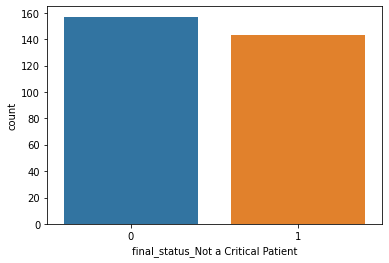

In [ ]:
sns.countplot(df['final_status_Not a Critical Patient'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X = df.drop(columns=['final_status_Not a Critical Patient'],axis=1)

y = df['final_status_Not a Critical Patient']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()


model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(patience=25,monitor='val_loss',mode='min')

In [ ]:
results = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=500,callbacks=[early_stop])

Epoch 1/500
7/7 [==============================] - 1s 31ms/step - loss: 0.7478 - accuracy: 0.4428 - val_loss: 0.7336 - val_accuracy: 0.4545
Epoch 2/500
7/7 [==============================] - 0s 9ms/step - loss: 0.7325 - accuracy: 0.4527 - val_loss: 0.7217 - val_accuracy: 0.4949
Epoch 3/500
7/7 [==============================] - 0s 8ms/step - loss: 0.7200 - accuracy: 0.4677 - val_loss: 0.7109 - val_accuracy: 0.5253
Epoch 4/500
7/7 [==============================] - 0s 9ms/step - loss: 0.7086 - accuracy: 0.4876 - val_loss: 0.7008 - val_accuracy: 0.5455
Epoch 5/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6983 - accuracy: 0.5274 - val_loss: 0.6915 - val_accuracy: 0.5354
Epoch 6/500
7/7 [==============================] - 0s 9ms/step - loss: 0.6898 - accuracy: 0.5473 - val_loss: 0.6827 - val_accuracy: 0.5556
Epoch 7/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6803 - accuracy: 0.5572 - val_loss: 0.6747 - val_accuracy: 0.5657
Epoch 8/500
7/7 [=========

In [ ]:
losses = pd.DataFrame(model.history.history)

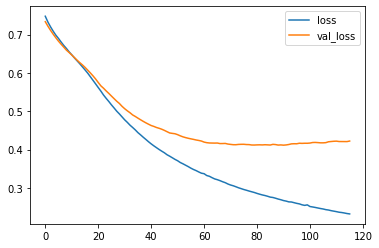

In [ ]:
losses[['loss','val_loss']].plot()

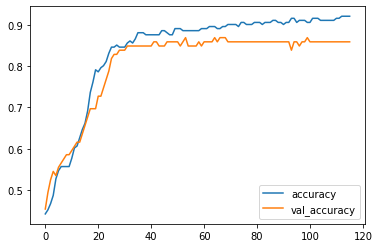

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
preds = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
preds = preds > 0.5

In [ ]:
preds

array([[False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        55
           1       0.88      0.80      0.83        44

    accuracy                           0.86        99
   macro avg       0.86      0.85      0.86        99
weighted avg       0.86      0.86      0.86        99



In [ ]:
print(confusion_matrix(y_test,preds))

[[50  5]
 [ 9 35]]


In [ ]:
model.save('Symptoms_chronic_kidney_diseases_elderly.h5')

******

***Compilcation 1 : Anemia***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install kaggle --upgrade
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d biswaranjanrao/anemia-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/4.61k [00:00<?, ?B/s]
100% 4.61k/4.61k [00:00<00:00, 5.08MB/s]


In [ ]:
!unzip /content/anemia-dataset.zip

Archive:  /content/anemia-dataset.zip
  inflating: anemia.csv              


In [ ]:
df = pd.read_csv("/content/anemia.csv")

In [ ]:
df

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0


In [ ]:
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler()

In [ ]:
X = df.drop(columns=['Result'],axis=1)

y = df['Result']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train = sc.fit_transform(X_train)

In [ ]:
X_test = sc.transform(X_test)

In [ ]:
from sklearn.metrics import auc, roc_curve

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def metrics(target, pred):
  fpr,tpr,threshold = roc_curve(target,pred)
  return auc(fpr,tpr)

In [ ]:
Rf = RandomForestClassifier()
model_Rf = Rf.fit(X_train,y_train)

preds = model_Rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,preds))  #Not Usable

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       203

    accuracy                           1.00       469
   macro avg       1.00      1.00      1.00       469
weighted avg       1.00      1.00      1.00       469



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN_model1 = KNN.fit(X_train,y_train)
pred = KNN_model1.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

[[249  17]
 [ 15 188]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       266
           1       0.92      0.93      0.92       203

    accuracy                           0.93       469
   macro avg       0.93      0.93      0.93       469
weighted avg       0.93      0.93      0.93       469



In [ ]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN_model = KNN.fit(X_train,y_train)
pred = KNN_model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

[[260   6]
 [  5 198]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       266
           1       0.97      0.98      0.97       203

    accuracy                           0.98       469
   macro avg       0.98      0.98      0.98       469
weighted avg       0.98      0.98      0.98       469



In [ ]:
import pickle

kNN = KNeighborsClassifier(n_neighbors=1)
kNN.fit(X_train,y_train)

# Its important to use binary mode
knnPickle = open('KNN_model_anemia', 'wb')

# source, destination
pickle.dump(KNN, knnPickle)


In [ ]:
model = pickle.load(open('KNN_model_anemia', 'rb'))

In [ ]:
df.columns

Index(['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV', 'Result'], dtype='object')

In [ ]:
print('Enter 1 for Yes & 0 for No')
print("Enter the values as they are if required")

features = []

list_ = []

columns = ['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV']

for i in columns:
    d = float(input('{} :'.format(i)))
    list_.append(d)

features = [list_]

features = pd.DataFrame(features)

predictions = model.predict(features)

if predictions > 0.5:
    print('Probable Anemia')
else:
    print('Probable No Anemia')

Enter 1 for Yes & 0 for No
Enter the values as they are if required
Gender :1
Hemoglobin :11.1
MCH :22.3
MCHC :26
MCV :84
Probable Anemia
